In [ ]:
'''Here I want to analyze the different trends across the whole world. I want to see if things
in the world are getting better, as I am expecting them to; or if they are staying the same 
or, even worst, getting worse.''' 

In [1]:
import pandas as pd
import requests
import json
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 

In [9]:
# Firstly, I look at the data for the crude deaths per 1,000 in the world.

response = requests.get("http://api.worldbank.org/countries/indicators/SP.DYN.CDRT.IN?per_page=13900&date=1960:2016&format=json")
data = response.json()
df1 = pd.read_json(json.dumps(data[1]))
df1['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df1['country'])))
df1['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df1['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df1 = df1.dropna()

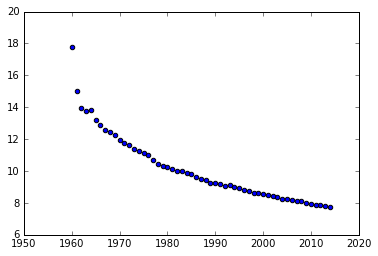

In [10]:
# I now want to see how the death rate per 1,000 has changed in the world.
df1world = df1[df1['country_cleaned'] == 'World']
plt.scatter(df1world['date'], df1world['value'])

In [11]:
# I now want to look at the life expectancy for females.
response = requests.get("http://api.worldbank.org/countries/indicators/SP.DYN.LE00.FE.IN?per_page=13000&date=1960:2016&format=json")
data = response.json()
df2 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df2['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df2['country'])))
df2['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df2['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df2 = df2.dropna()

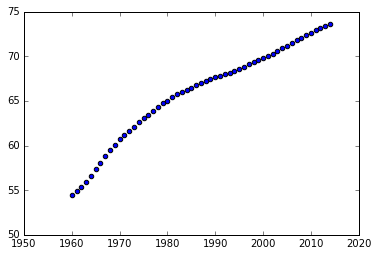

In [12]:
df2world = df2[df2['country_cleaned'] == 'World']
plt.scatter(df2world['date'], df2world['value'])

In [13]:
# Now I want to see the life expectancy changes for males.
response = requests.get("http://api.worldbank.org/countries/indicators/SP.DYN.LE00.MA.IN?per_page=13000&date=1960:2016&format=json")
data = response.json()
df3 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df3['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df3['country'])))
df3['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df3['indicator'])))
df3 = df3.dropna()

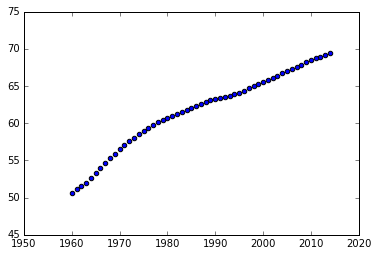

In [14]:
df3world = df3[df3['country_cleaned'] == 'World']
plt.scatter(df3world['date'], df3world['value'])

In [ ]:
# The graph looks roughly the same for both males and females. However, the values for males are lower than.

In [16]:
# Now I want to look at the total life expectancy.
response = requests.get("http://api.worldbank.org/countries/indicators/SP.DYN.LE00.IN?per_page=13000&date=1960:2016&format=json")
data = response.json()
df4 = pd.read_json(json.dumps(data[1]))
df4['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df4['country'])))
df4['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df4['indicator'])))
df4 = df4.dropna()

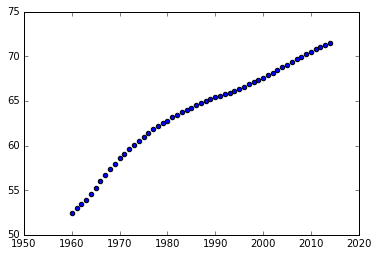

In [17]:
df4world = df4[df4['country_cleaned'] == 'World']
plt.scatter(df4world['date'], df4world['value'])

'''I can see very similar patterns as I would anywhere else which is expected.'''

In [18]:
# I now want to look at how population 0-14 in the world has changed.

response = requests.get("http://api.worldbank.org/countries/indicators/SP.POP.0014.TO.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df5 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df5['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df5['country'])))
df5['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df5['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df5 = df5.dropna()

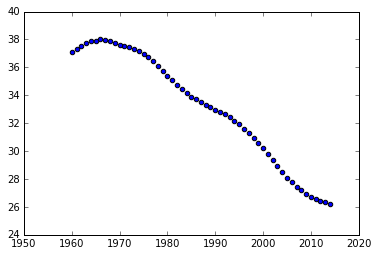

In [19]:
df5world = df5[df5['country_cleaned'] == 'World']
plt.scatter(df5world['date'], df5world['value'])

'''The population of people aged 0-14 has decreased which is expected as I hear a lot of talk about 
the world population getting older. However, it is interesting to see that it has not been a steady decrease.
RAther, it initially increased and was flactuating slightly.'''

In [20]:
# Now I want to look at the population over 65 in the world.
response = requests.get("http://api.worldbank.org/countries/indicators/SP.POP.65UP.TO.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df6 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df6['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df6['country'])))
df6['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df6['indicator'])))
df6 = df6.dropna()

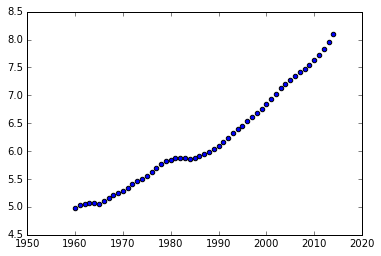

In [21]:
df6world = df6[df6['country_cleaned'] == 'World']
plt.scatter(df6world['date'], df6world['value'])

In [ ]:
'''This is really interesting. I have been expecting it to increase. However, I have not anticipated the slight
drops and flactuations between 1960-1980.'''

In [22]:
# Now I want to look at the population growth in the world.
response = requests.get("http://api.worldbank.org/countries/indicators/SP.POP.GROW?per_page=13000&date=1960:2016&format=json")
data = response.json()
df7 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df7['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df7['country'])))
df7['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df7['indicator'])))
df7 = df7.dropna()

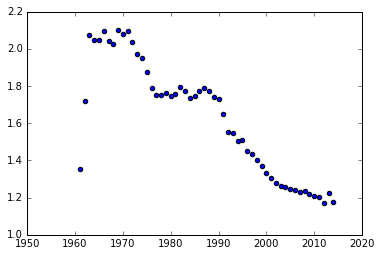

In [23]:
df7world = df7[df7['country_cleaned'] == 'World']
plt.scatter(df7world['date'], df7world['value'])

In [ ]:
'''This graph is insanely interesting. There are a lot of flactuations - even though they are quite slight.
I am interested in what regions and countries had the biggest flactuations - this is something I definitely
want to look into.'''

In [24]:
# I want to look at the population in the largest cities.
response = requests.get("http://api.worldbank.org/countries/indicators/EN.URB.LCTY.UR.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df8 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df8['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df8['country'])))
df8['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df8['indicator'])))
df8 = df8.dropna()

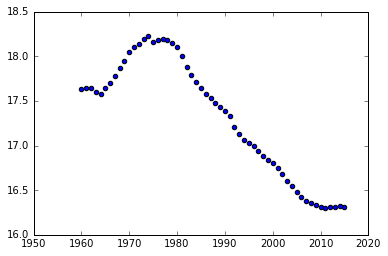

In [25]:
df8world = df8[df8['country_cleaned'] == 'World']
plt.scatter(df8world['date'], df8world['value'])

In [ ]:
'''Again, another interesting graph. I would have expected the population in the largest cities to 
keep on increasing as peple migrate to bigger cities in search of wealth. I can see that initially,
there is an increase and then there is a fairly steady decrease which then levels off.'''

In [26]:
# Now I want to look at the population in urban aglomeration above 1M.
response = requests.get("http://api.worldbank.org/countries/indicators/EN.URB.MCTY.TL.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df9 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df9['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df9['country'])))
df9['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df9['indicator'])))
df9 = df9.dropna()

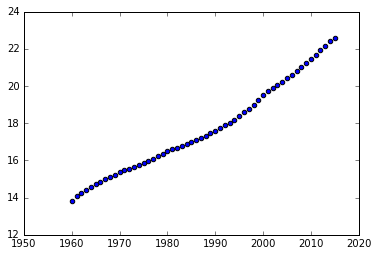

In [27]:
df9world = df9[df9['country_cleaned'] == 'World']
plt.scatter(df9world['date'], df9world['value'])

In [ ]:
'''This is really interesting. That means that people are migrating to bigger cities - but only if
those cities have more than 1M people living in them. If the proportion of the world population in big cities
has been decreasing, that means that people try to migrate to bigger cities but not to any cities.'''

In [28]:
# I want to look at population aged 15-64
response = requests.get("http://api.worldbank.org/countries/indicators/SP.POP.1564.TO.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df10 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df10['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df10['country'])))
df10['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df10['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df10 = df10.dropna()

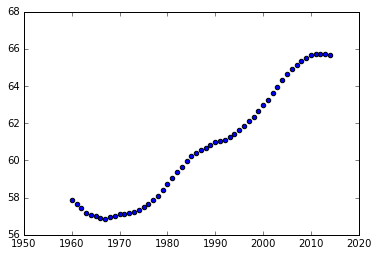

In [29]:
df10world = df10[df10['country_cleaned'] == 'World']
plt.scatter(df10world['date'], df10world['value'])

In [ ]:
'''Again, I think this makes sense. The proportion of population aged 15-64 has been increasing.'''

In [31]:
# I'm now looking at population of females as % of total
response = requests.get("http://api.worldbank.org/countries/indicators/SP.POP.TOTL.FE.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df11 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df11['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df11['country'])))
df11['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df11['indicator'])))
df11 = df11.dropna()

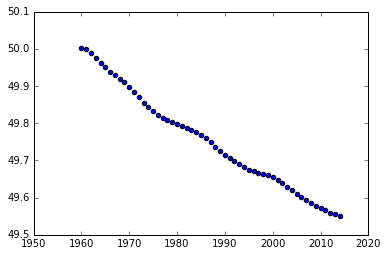

In [32]:
df11world = df11[df11['country_cleaned'] == 'World']
plt.scatter(df11world['date'], df11world['value'])

In [ ]:
'''This is really interesting. I can see that the proportion of females in the world has
been decreasing which is very bizarre. However, looking at the numbers, this number has decreased only very
slightly.'''

In [33]:
# Total population
response = requests.get("http://api.worldbank.org/countries/indicators/SP.POP.TOTL?per_page=13000&date=1960:2016&format=json")
data = response.json()
df12 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df12['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df12['country'])))
df12['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df12['indicator'])))
df12 = df12.dropna()

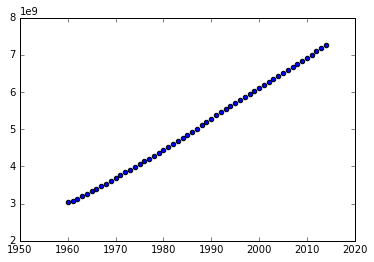

In [34]:
df12world = df12[df12['country_cleaned'] == 'World']
plt.scatter(df12world['date'], df12world['value'])

In [ ]:
'''This is a very steaady increase - I expected something more of an expontential increase.'''

In [35]:
# Rural population as % of total population
response = requests.get("http://api.worldbank.org/countries/indicators/SP.RUR.TOTL.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df13 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df13['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df13['country'])))
df13['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df13['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df13 = df13.dropna()

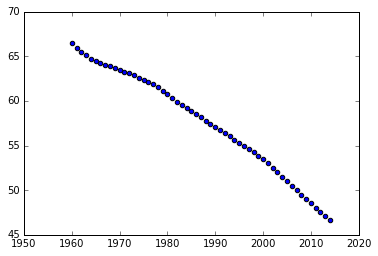

In [36]:
df13world = df13[df13['country_cleaned'] == 'World']
plt.scatter(df13world['date'], df13world['value'])

In [ ]:
'''Looking at the above graphs of urban and city population, I am not surprised that there has been
a decrease in the rural population.'''

In [37]:
# I now want to look at the world population in total numbers.
response = requests.get("http://api.worldbank.org/countries/indicators/SP.RUR.TOTL?per_page=13000&date=1960:2016&format=json")
data = response.json()
df14 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df14['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df14['country'])))
df14['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df14['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df14 = df14.dropna()

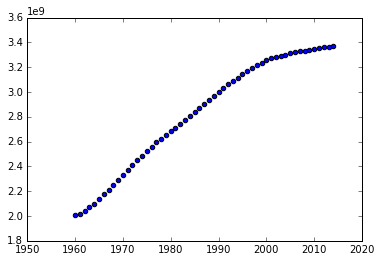

In [38]:
df14world = df14[df14['country_cleaned'] == 'World']
plt.scatter(df14world['date'], df14world['value'])

In [ ]:
'''As the population increased, the rural population increased as well. However, as a percentage of all
the population, they have decrease.'''
# For rural poverty gap at national poverty lines there's no information for the world.

In [41]:
# Urban population as % of total
response = requests.get("http://api.worldbank.org/countries/indicators/SP.URB.TOTL.IN.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df15 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df15['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df15['country'])))
df15['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df15['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df15 = df15.dropna()

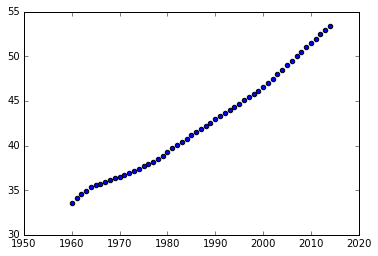

In [42]:
df15world = df15[df15['country_cleaned'] == 'World']
plt.scatter(df15world['date'], df15world['value'])

In [ ]:
'''Again, to be expected.'''

In [43]:
response = requests.get("http://api.worldbank.org/countries/indicators/SP.URB.TOTL?per_page=13000&date=1960:2016&format=json")
data = response.json()
df16 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df16['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df16['country'])))
df16['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df16['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df16 = df16.dropna()

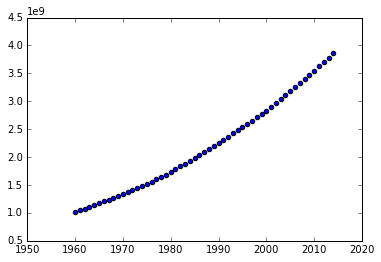

In [44]:
df16world = df16[df16['country_cleaned'] == 'World']
plt.scatter(df16world['date'], df16world['value'])